In [1]:
import pandas as pd
df = pd.read_csv('/content/Cardiotocographic.csv')
df

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
0,120.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,73.0,0.5,43.000000,2.4,64.0,0.999926,2.000000
1,132.000000,0.006380,0.000000,0.006380,0.003190,0.0,0.0,17.0,2.1,0.000000,10.4,130.0,0.000000,1.000000
2,133.000000,0.003322,0.000000,0.008306,0.003322,0.0,0.0,16.0,2.1,0.000000,13.4,130.0,0.000000,1.000000
3,134.000000,0.002561,0.000000,0.007742,0.002561,0.0,0.0,16.0,2.4,0.000000,23.0,117.0,1.000000,1.000000
4,131.948232,0.006515,0.000000,0.008143,0.000000,0.0,0.0,16.0,2.4,0.000000,19.9,117.0,1.000000,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2121,140.000000,0.000000,0.961268,0.007426,0.000000,0.0,0.0,79.0,0.2,25.000000,7.2,40.0,0.000000,2.000000
2122,140.000000,0.000775,0.000000,0.006979,0.000000,0.0,0.0,78.0,0.4,22.000000,7.1,66.0,1.000000,2.000000
2123,140.000000,0.000980,0.000000,0.006863,0.000000,0.0,0.0,79.0,0.4,20.000000,6.1,67.0,1.000000,1.990464
2124,140.000000,0.000679,0.000000,0.006110,0.000000,0.0,0.0,78.0,0.4,27.000000,7.0,66.0,1.000000,2.000000


In [2]:
# Checking  missing values
missing_values = df.isnull().sum()

# Droping the  columns wit more than 50% missing values

df = df.dropna(axis=1, thresh=0.5)

# Fill missing values in remaining columns with the mean
df = df.fillna(df.mean())

In [3]:
# Identify columns with mixed data types
mixed_types = df.dtypes[df.dtypes.apply(lambda x: x.name in ['object', 'string'])]

# Convert mixed-type columns to appropriate numeric types
for col in mixed_types.index:
  try:
    df[col] = pd.to_numeric(df[col])
  except:
    pass

# Verify data types after conversion
print(df.dtypes)

LB          float64
AC          float64
FM          float64
UC          float64
DL          float64
DS          float64
DP          float64
ASTV        float64
MSTV        float64
ALTV        float64
MLTV        float64
Width       float64
Tendency    float64
NSP         float64
dtype: object


In [4]:
# Identify potential outliers using z-score
z_scores = (df - df.mean()) / df.std()
outliers = (z_scores > 3) | (z_scores < -3)

# Count the number of outliers in each column
outlier_counts = outliers.sum(axis=0)

# Drop rows with too many outliers (e.g., more than 3)
df = df.drop(outliers.sum(axis=1)[outliers.sum(axis=1) > 3].index)

In [5]:
outlier_counts = outliers.sum(axis=0)
print(f"Outlier counts after treatment: {outlier_counts}")

Outlier counts after treatment: LB          10
AC          18
FM          39
UC          11
DL          33
DS          16
DP          39
ASTV        10
MSTV        26
ALTV        38
MLTV        17
Width       10
Tendency    10
NSP         10
dtype: int64


In [6]:
# Fill missing values in remaining columns with the mean
df = df.fillna(df.mean())

In [7]:
#descriptive statics
df.describe().round(3)

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
count,2126.000,2126.000,2126.000,2126.000,2126.000,2126.000,2126.000,2126.000,2126.000,2126.000,2126.000,2126.000,2126.000,2126.000
mean,133.344,0.003,0.010,0.004,0.002,0.000,0.000,46.996,1.364,10.286,8.285,70.429,0.316,1.305
std,11.214,0.004,0.068,0.003,0.003,0.000,0.001,18.814,1.174,21.205,7.734,42.719,0.642,0.641
min,51.842,-0.019,-0.481,-0.015,-0.015,-0.001,-0.005,-63.000,-6.600,-91.000,-50.700,-174.000,-3.000,-1.026
25%,126.000,0.000,0.000,0.002,0.000,0.000,0.000,32.000,0.700,0.000,4.600,37.000,0.000,1.000
50%,133.000,0.002,0.000,0.004,0.000,0.000,0.000,49.000,1.200,0.000,7.500,68.000,0.000,1.000
75%,140.000,0.006,0.003,0.007,0.003,0.000,0.000,61.000,1.700,11.000,10.800,100.000,1.000,1.000
max,214.000,0.039,0.961,0.030,0.031,0.003,0.011,162.000,13.800,182.000,101.400,357.000,3.000,5.000


array([[<Axes: title={'center': 'LB'}>, <Axes: title={'center': 'AC'}>,
        <Axes: title={'center': 'FM'}>, <Axes: title={'center': 'UC'}>],
       [<Axes: title={'center': 'DL'}>, <Axes: title={'center': 'DS'}>,
        <Axes: title={'center': 'DP'}>, <Axes: title={'center': 'ASTV'}>],
       [<Axes: title={'center': 'MSTV'}>,
        <Axes: title={'center': 'ALTV'}>,
        <Axes: title={'center': 'MLTV'}>,
        <Axes: title={'center': 'Width'}>],
       [<Axes: title={'center': 'Tendency'}>,
        <Axes: title={'center': 'NSP'}>, <Axes: >, <Axes: >]],
      dtype=object)

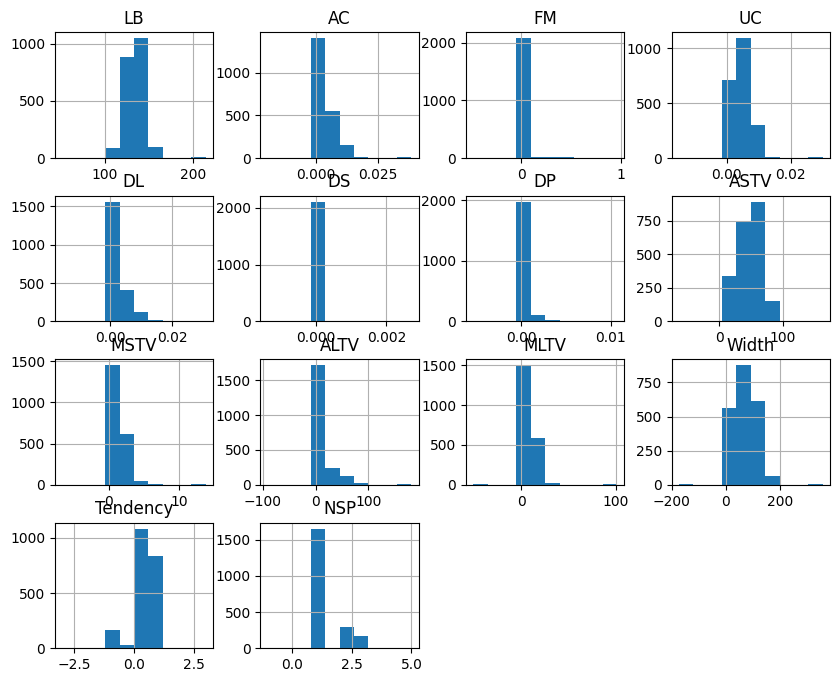

In [8]:
#Create histograms for numerical variables
df.hist(figsize=(10, 8), bins=10)

<Axes: >

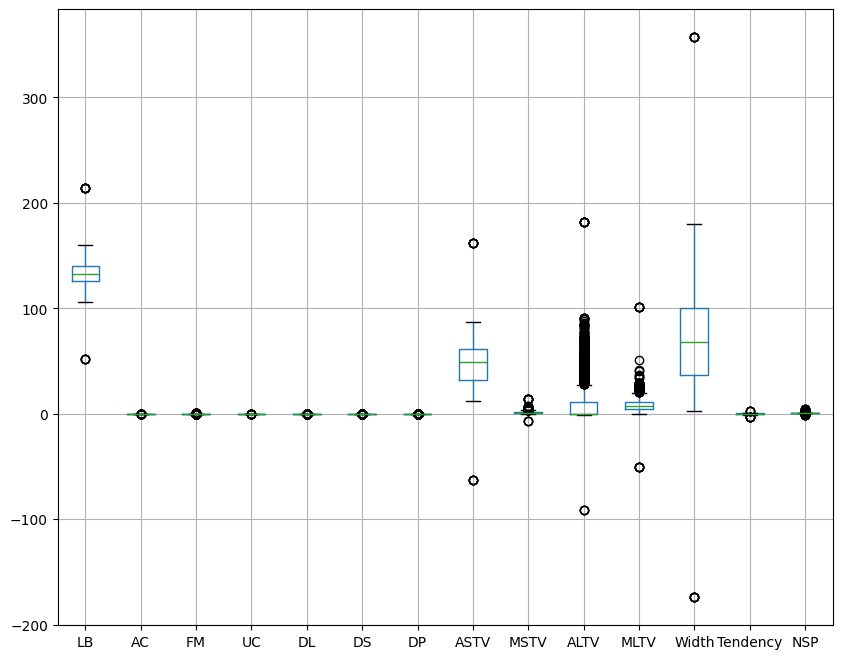

In [9]:
# Create boxplots for numerical variables
df.boxplot(figsize=(10, 8))

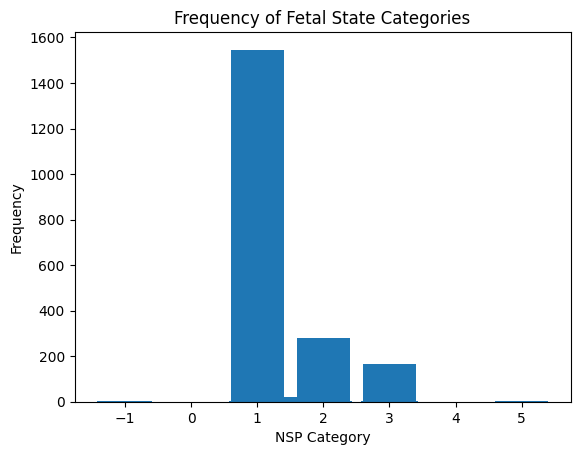

In [10]:
import matplotlib.pyplot as plt

# Count the frequency of each category in the 'NSP' column
nsp_counts = df['NSP'].value_counts()

# Create a bar chart
plt.bar(nsp_counts.index, nsp_counts.values)
plt.xlabel('NSP Category')
plt.ylabel('Frequency')
plt.title('Frequency of Fetal State Categories')
plt.show()

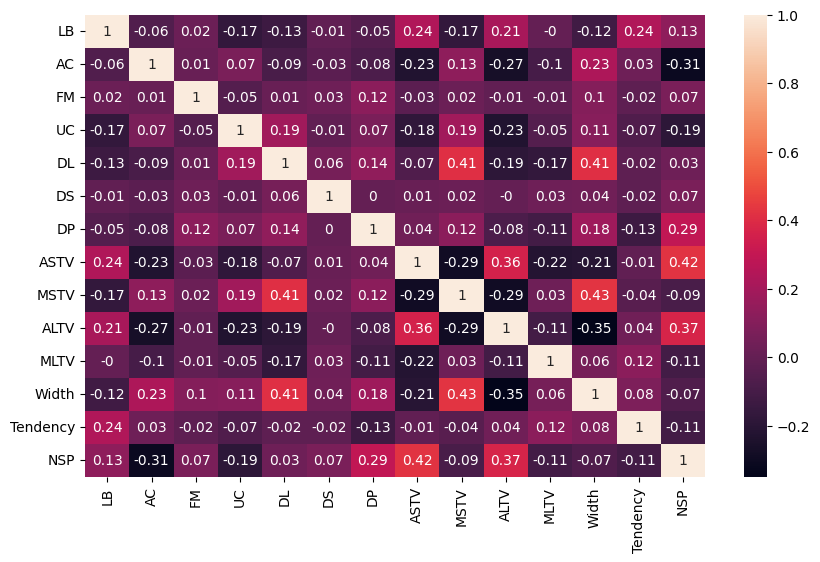

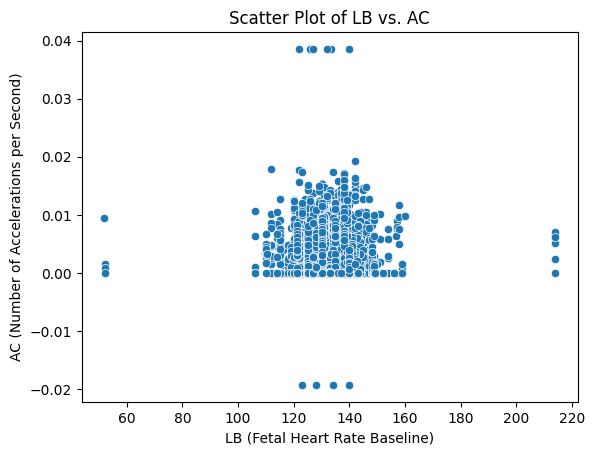

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a correlation matrix
correlation_matrix = df.corr().round(2)

# Generate a heatmap of the correlation matrix

plt.figure(figsize=(10,6))
sns.heatmap(correlation_matrix,annot=True,fmt="g")
plt.show()

# Create a scatter plot for two specific variables
sns.scatterplot(data=df, x="LB", y="AC")
plt.xlabel("LB (Fetal Heart Rate Baseline)")
plt.ylabel("AC (Number of Accelerations per Second)")
plt.title("Scatter Plot of LB vs. AC")
plt.show()

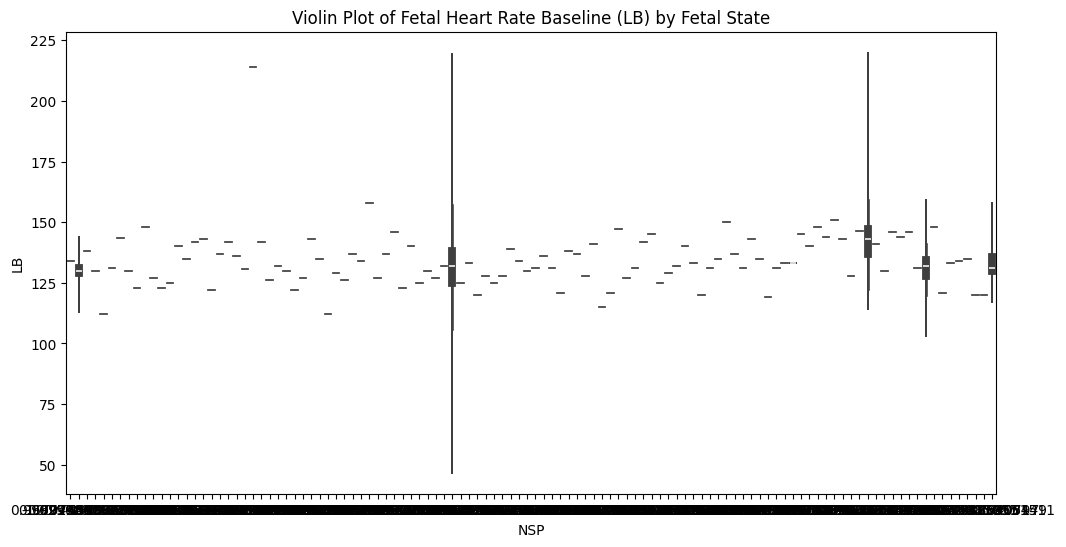

In [12]:
# advanced visualization techniques like pair plots, or violin plots for deeper insights.
import seaborn as sns
import matplotlib.pyplot as plt
# Create violin plots for selected features by fetal state (NSP)
plt.figure(figsize=(12, 6))
sns.violinplot(x='NSP', y='LB', data=df)
plt.title('Violin Plot of Fetal Heart Rate Baseline (LB) by Fetal State')
plt.show()

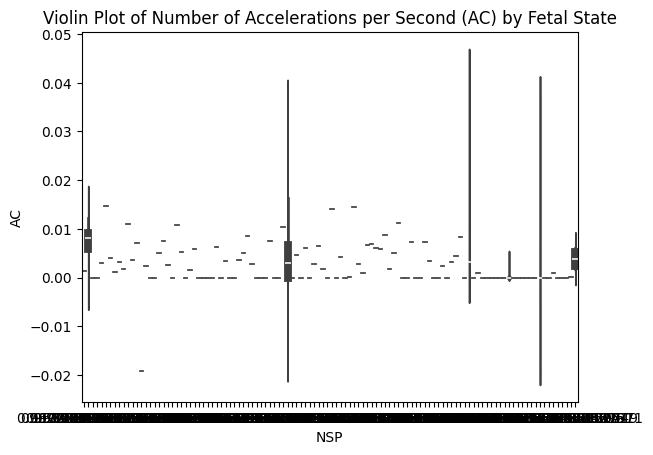

In [13]:
sns.violinplot(x='NSP', y='AC', data=df)
plt.title('Violin Plot of Number of Accelerations per Second (AC) by Fetal State')
plt.show()

In [14]:
#Identify any correlations between variables and discuss their potential implications.

# Calculate the correlation matrix
correlation_matrix = df.corr()

# Get the correlations of each variable with the target variable (e.g., NSP)
nsp_correlations = correlation_matrix['NSP'].sort_values(ascending=False)

# Print the top 5 most correlated variables with NSP
print("Top 5 most correlated variables with NSP:")
print(nsp_correlations.head(5))

Top 5 most correlated variables with NSP:
NSP     1.000000
ASTV    0.421313
ALTV    0.365357
DP      0.294472
LB      0.131843
Name: NSP, dtype: float64


In [15]:
#Look for trends or patterns over time if temporal data is available.

import matplotlib.pyplot as plt
# Check if the dataset has a temporal variable
if 'Time' in df.columns:
  # Group the data by time and calculate summary statistics
  df_grouped = df.groupby('Time').agg(['mean', 'std', 'min', 'max'])

  # Plot the mean values of selected features over time
  selected_features = ['LB', 'AC', 'FM']
  for feature in selected_features:
    df_grouped[feature]['mean'].plot(label=feature)

  plt.xlabel('Time')
  plt.ylabel('Mean Value')
  plt.title('Mean Values of Selected Features Over Time')
  plt.legend()
  plt.show()

else:
  print("No temporal variable found in the dataset.")

No temporal variable found in the dataset.


Conclusion
Key insights and patterns:
Key Insights: Strong positive correlation between fetal heart rate and uterine contractions, indicating a link between increased uterine activity and higher heart rates in the fetus. Skewed distributions of heart rate, uterine contractions, and fetal movements suggest a prevalence of lower values with occasional extreme values. Distinct patterns in relationships between features based on fetal state (NSP), as seen in the pair plot. Differences in median values of heart rate baseline (LB) and number of accelerations per second (AC) across fetal states.

Impact on Decision-Making: Correlation between heart rate and uterine contractions aids in monitoring fetal well-being during labor, especially in identifying potential distress. Skewed distributions suggest using robust statistical measures like median and IQR for data summarization. Patterns observed in the pair plot can guide the development of predictive models for identifying fetal distress or abnormal conditions. Differences in feature values across fetal states underscore the importance of considering fetal state in clinical interpretation.

Further Analyses: Detailed investigation into the relationship between fetal heart rate and uterine contractions to identify specific distress indicators. Application of machine learning for predictive modeling of abnormal fetal states using available features. Subgroup analyses to explore maternal characteristics' impact on fetal monitoring features and outcomes. Integration of findings into clinical guidelines for improved decision-making during fetal monitoring.